In [1]:
#imports
import logging
import torch
# set seed
import pandas as pd
import numpy as np
import utils as ut
import experiment as ex
from evaluation import *
from sklearn.metrics import mean_squared_error
from torch.utils.tensorboard import SummaryWriter
import torch
import random
#define fixed_hyperparams and create a config gen
from configurations import RandomConfigGen, Configuration
from torch import nn
from deep_net import RandomNet
from experiment import run_experiment
import regex as re
from pathlib import *
from sk_models import PLSRegression
import matplotlib.pyplot as plt
from river.ensemble import SRPRegressor
from sk_models import PLSRegression, StandardScaler,LocalWeightedRegression,PLSLWR,LinearRidge
from river_models import *

from river import stream,linear_model,preprocessing, ensemble, metrics, optim
from river.neighbors import KNNRegressor 
from sklearn.metrics import mean_squared_error
from river.utils import dict2numpy, numpy2dict

seed = 1
torch.manual_seed(seed)
random.seed(seed + 1)
np.random.seed(seed + 2)
random_state = np.random.RandomState(seed)
import gc
torch.cuda.empty_cache()
gc.collect()

print(f"GPU detected is {torch.cuda.get_device_name(0)}")

GPU detected is GeForce GTX 970


In [7]:
log_path = Path("D:/workspace/lazydeep/experiments/6.03.1_v4/PLN7")
results1_total = pd.read_csv(log_path/"r2_scores.csv",index_col=0)
results1_rolling = pd.read_csv(log_path/"r2_scores_rolling.csv",index_col=0)

In [8]:
log_path = Path("D:/workspace/lazydeep/experiments/6.03_v7/PLN7")
results2_total = pd.read_csv(log_path/"r2_scores.csv",index_col=0)
results2_rolling = pd.read_csv(log_path/"r2_scores_rolling.csv",index_col=0)

In [49]:
log_path = Path("D:/workspace/lazydeep/experiments/6.00") #1.01/")
file_name = "PLN7.csv"
if not log_path.exists():
    log_path.mkdir()

log_dir = log_path / re.sub(r'\.(?=csv$)[^.]+$', '',file_name)
if not log_dir.exists():
    log_dir.mkdir()
print(f"Output directory is {log_dir}")

Output directory is D:\workspace\lazydeep\experiments\6.00\PLN7


(0.0, 1.0)

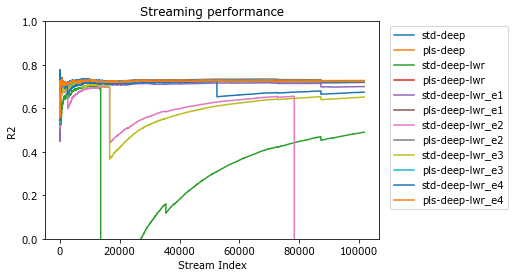

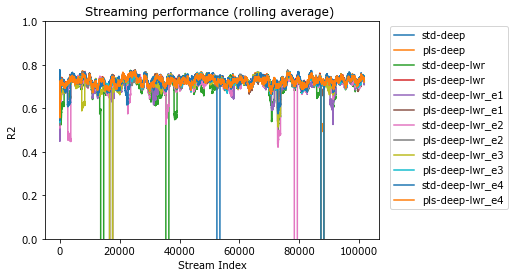

In [50]:
#test1

subset = results1_total
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance")


for (columnName, columnData) in subset.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
#plt.savefig(log_dir / f"r2_plot_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
#plt.savefig(log_dir / f"r2_plot_v2_deep.png",bbox_inches='tight')

subset = results1_rolling
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance (rolling average) ")


for (columnName, columnData) in subset.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_rolling_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_rolling_v2_deep.png",bbox_inches='tight')
    

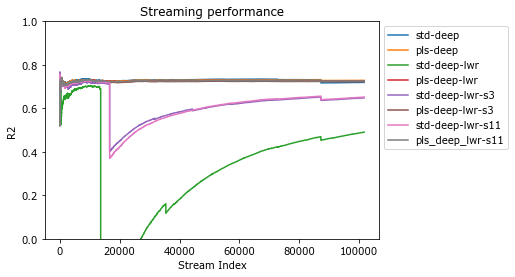

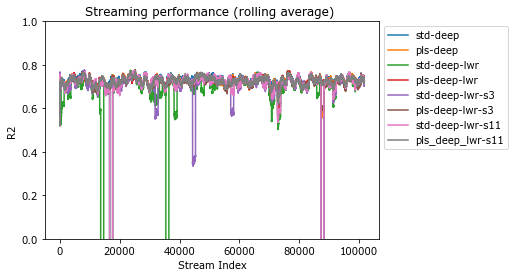

In [51]:
#test1

subset = results2_total
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance")


for (columnName, columnData) in subset.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
#lt.savefig(log_dir / f"r2_plot_v2_deep.png",bbox_inches='tight')

subset = results2_rolling
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance (rolling average) ")


for (columnName, columnData) in subset.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_rolling_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_rolling_v2_deep.png",bbox_inches='tight')
    

In [11]:
def take_subset_by_str(dataset,s,reverse=False):
    col_names = dataset.columns.tolist()
    if reverse:
        encoding = [i for i in col_names if not (s in i)]
    else:
        encoding = [i for i in col_names if (s in i)]
    return dataset[encoding]


def take_subset_by_re(dataset,s,reverse=False):
    col_names = dataset.columns.tolist()
    if reverse:
        encoding = [i for i in col_names if not s.match(i)]
    else:
        encoding = [i for i in col_names if s.match(i)]
    return dataset[encoding]

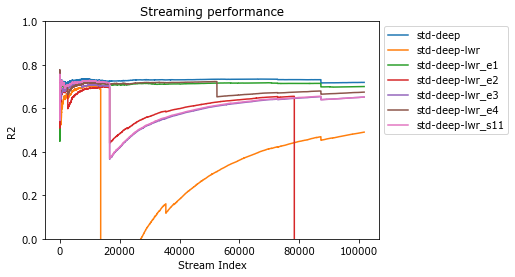

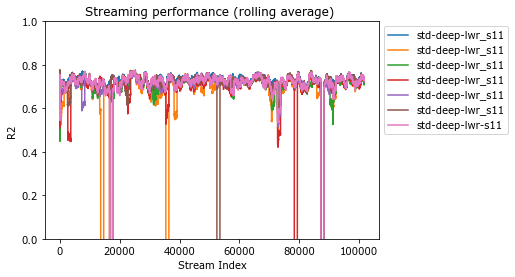

In [56]:
#merge pls 
subset1 = take_subset_by_str(results1_total ,'pls',reverse=True)
subset2 = take_subset_by_str(results2_total ,'pls',reverse=True)
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance")


for (columnName, columnData) in subset1.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
col = "std-deep-lwr-s11"
ax.plot(subset2[col].index,subset2[col], label= "std-deep-lwr_s11")
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_std_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_v2_std_deep.png",bbox_inches='tight')

subset1 = take_subset_by_str(results1_rolling ,'pls',reverse=True)
subset2 = take_subset_by_str(results2_rolling ,'pls',reverse=True)
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance (rolling average) ")


for (columnName, columnData) in subset1.iteritems():
    ax.plot(columnData.index,columnData,label =  f"std-deep-lwr_s11")
ax.plot(subset2[col].index,subset2[col], label= col)
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_rolling_std_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_rolling_v2_std_deep.png",bbox_inches='tight')

Index(['pls-deep', 'pls-deep-lwr', 'pls-deep-lwr-s3', 'pls_deep_lwr-s11'], dtype='object')


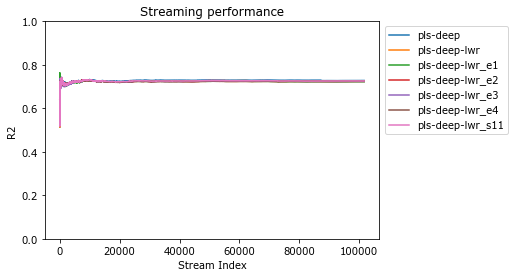

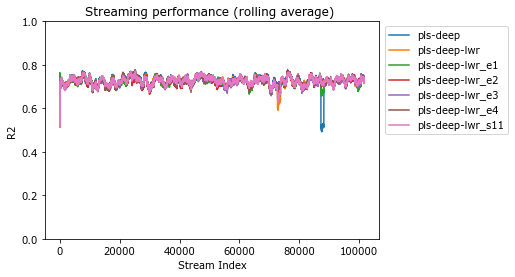

In [57]:
#merge pls 
subset1 = take_subset_by_str(results1_total ,'pls',reverse=False)
subset2 = take_subset_by_str(results2_total ,'pls',reverse=False)
print(subset2.columns)
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance")


for (columnName, columnData) in subset1.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
col = "pls_deep_lwr-s11"
ax.plot(subset2[col].index,subset2[col], label= 'pls-deep-lwr_s11')
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_pls_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_v2_pls_deep.png",bbox_inches='tight')

subset1 = take_subset_by_str(results1_rolling ,'pls',reverse=False)
subset2 = take_subset_by_str(results2_rolling ,'pls',reverse=False)
fig, ax = plt.subplots()

ax.set_xlabel("Stream Index")
ax.set_ylabel("R2")
ax.set_title("Streaming performance (rolling average) ")


for (columnName, columnData) in subset1.iteritems():
    ax.plot(columnData.index,columnData,label =  f"{columnName}")
ax.plot(subset2[col].index,subset2[col], label= 'pls-deep-lwr_s11')
#ax.plot([len(pretest_data),len(pretest_data)],[-1,1],c="black",ls='--')

ax.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.savefig(log_dir / f"r2_plot_rolling_pls_deep.png",bbox_inches='tight')
ax.set_ylim(0,1)
plt.savefig(log_dir / f"r2_plot_rolling_v2_pls_deep.png",bbox_inches='tight')
    